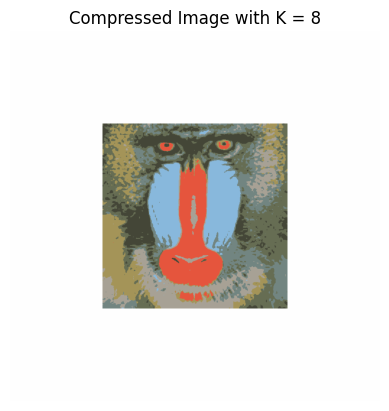

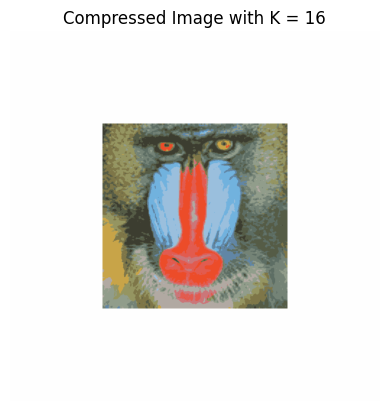

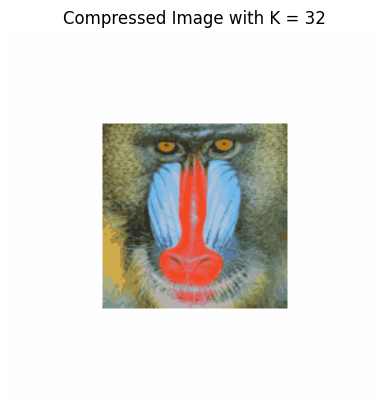

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io


image = io.imread('monkey.png')
image = np.array(image, dtype=np.float64) / 255


w, h, d = image.shape
pixels = np.reshape(image, (w * h, d))

def compress_image_with_kmeans(pixels, K):

    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(pixels)


    compressed_colors = kmeans.cluster_centers_
    labels = kmeans.predict(pixels)


    compressed_image = compressed_colors[labels].reshape(w, h, d)

    return compressed_image


K_values = [8, 16, 32]
for K in K_values:
    compressed_image = compress_image_with_kmeans(pixels, K)


    plt.figure()
    plt.imshow(compressed_image)
    plt.title(f'Compressed Image with K = {K}')
    plt.axis('off')
    plt.show()
